# Feature Engineering

### Feature engineering is the process of creating new features or transforming your existing features to get the most out of your data.

We will perfrom some Feature Creation, Feature Evaluation and Feature Transformation processes

### Feature Creation

The Feature Creation process is not intended to be performed on the processed data but rather on the raw data

In [21]:
import pandas as pd
import os
base_path  = 'datasets'
data = pd.read_csv(os.path.join(base_path,"SMSSpamCollection.tsv"),sep='\t',names=['label','body_text'])

# Text message length feature
# Count the length of text message without white spaces
data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))
data.head()


,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [22]:
# % of characters that are punctuations in text
import string


def count_puncts(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

data['punct_%'] = data['body_text'].apply(lambda x: count_puncts(x))
data.head()

,label,body_text,body_len,punct_%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


### Feature Evaluation

Evaluating each feature by comparing histograms for spam/ham labels. If the histograms are differnt, that means the feature has a high value for the model.

In [23]:
# % of characters that are capitalized in text

def count_caps(text):
    caps = sum(1 for char in text if char.isupper())
    return round(caps/len(text),3)*100

data['caps_%'] = data['body_text'].apply(lambda x: count_caps(x))
data.head()

,label,body_text,body_len,punct_%,caps_%
0,ham,I've been searching for the right words to tha...,160,2.5,1.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,6.5
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,3.3
3,ham,Even my brother is not like to speak with me. ...,62,3.2,2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,74.3


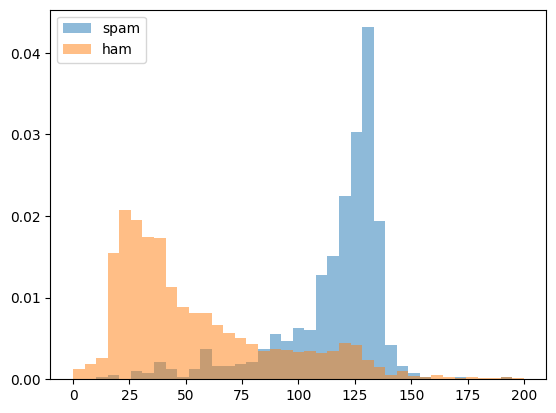

In [30]:
from matplotlib import pyplot
import numpy as np
# Tells matplotlib to show the plot in the result
%matplotlib inline

# Compare body_length histograms
# Retruns an array with 40 evenly space numbers between 0-200
bins = np.linspace(0,200,40)
# density=true - normalize the data so we could compare spam and ham even though they have differnt counts
pyplot.hist(data[data['label']=='spam']['body_len'],bins=bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'],bins=bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

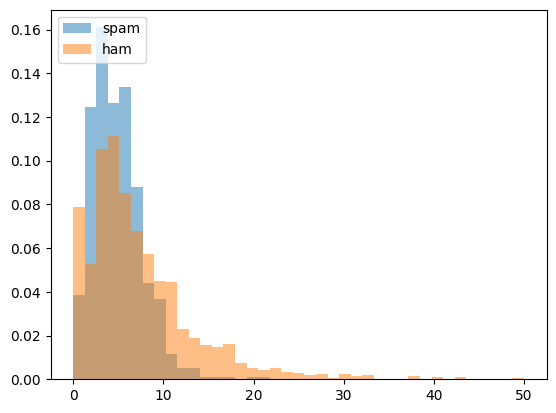

In [31]:
# Compare punctuation percentage histograms
# Retruns an array with 40 evenly space numbers between 0-50 (50 because here we are talking about percentage)
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['punct_%'],bins=bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data[data['label']=='ham']['punct_%'],bins=bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

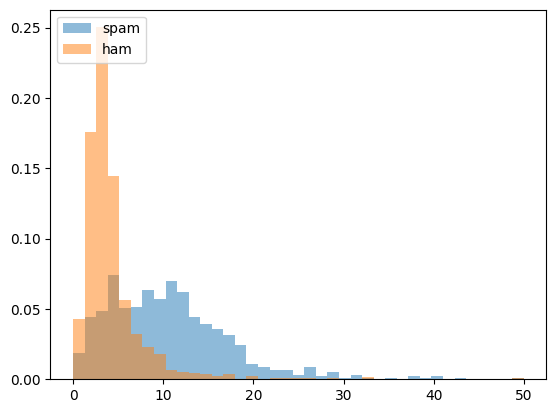

In [33]:
# Compare capitalized characters percentage histograms
# Retruns an array with 40 evenly space numbers between 0-50 (50 because here we are talking about percentage)
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['caps_%'],bins=bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data[data['label']=='ham']['caps_%'],bins=bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

### Feature Transformations

We first need to identify the feature to transform. We are looking for feature with skewed distribution.

Then we will perform transformation on the feature to make it more useful

#### Transformation Process

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

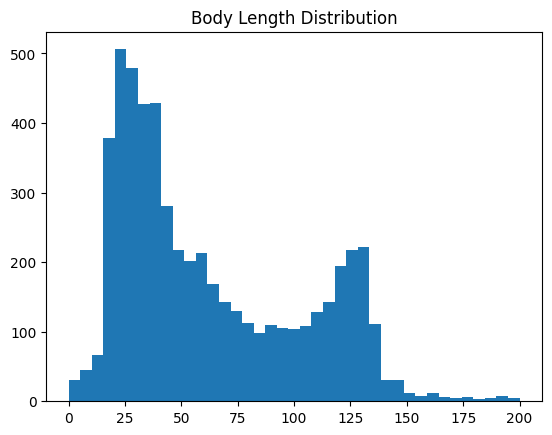

In [35]:
bins = np.linspace(0,200,40)
# Look at the entire histogram of body_len (not differnece between spam and ham)
pyplot.hist(data['body_len'],bins=bins)
pyplot.title("Body Length Distribution")
pyplot.show()

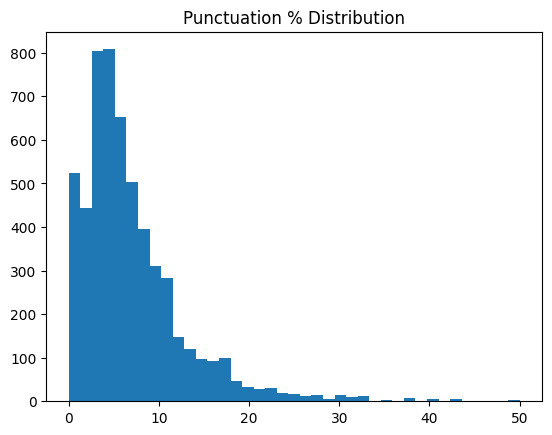

In [37]:
bins = np.linspace(0,50,40)
# Look at the entire histogram of punct_% (not differnece between spam and ham)
pyplot.hist(data['punct_%'],bins=bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

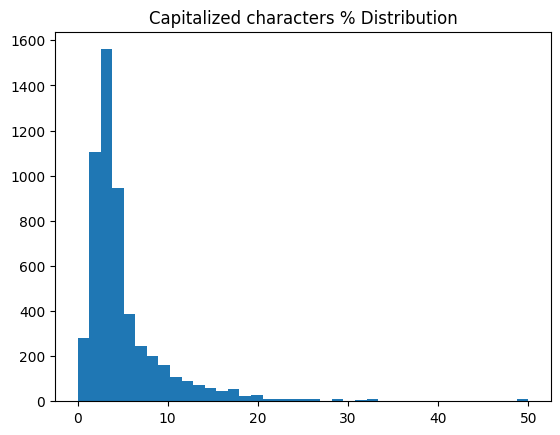

In [38]:
bins = np.linspace(0,50,40)
# Look at the entire histogram of caps_% (not differnece between spam and ham)
pyplot.hist(data['caps_%'],bins=bins)
pyplot.title("Capitalized characters % Distribution")
pyplot.show()

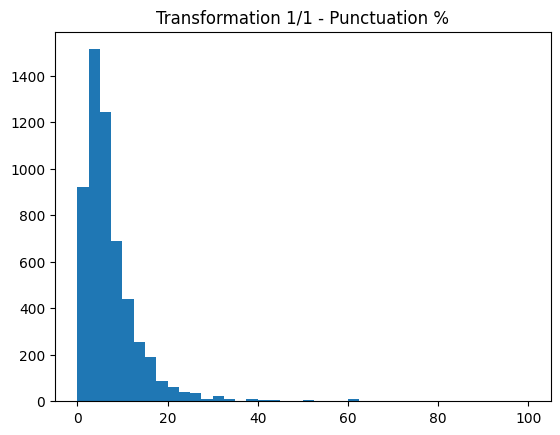

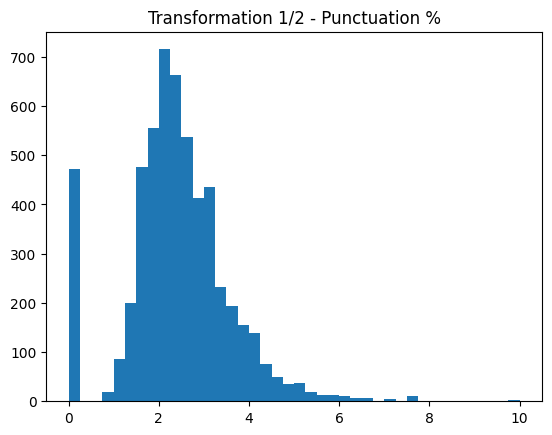

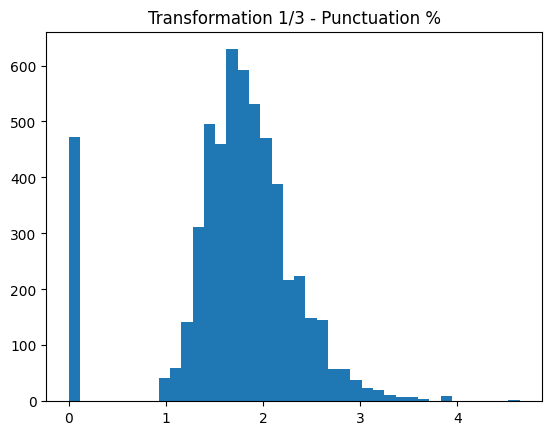

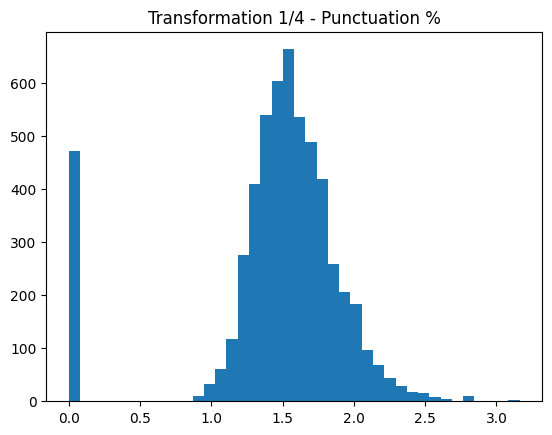

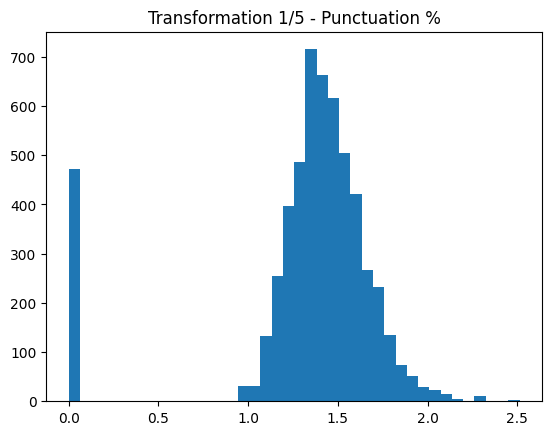

In [40]:
# Loop through different transformations
for i in [1,2,3,4,5]:
    pyplot.hist(data['punct_%']**(1/i),bins=40)
    pyplot.title(f"Transformation 1/{i} - Punctuation %")
    pyplot.show()
# 4 is the best option

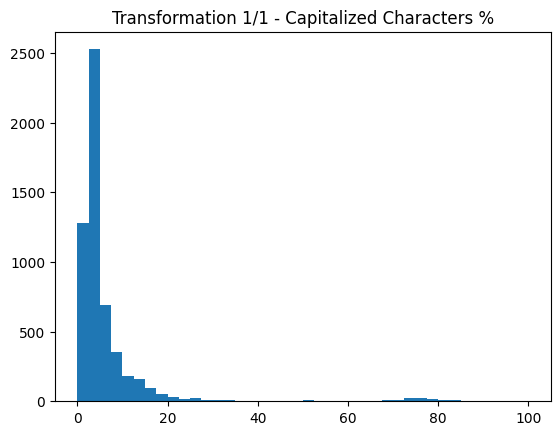

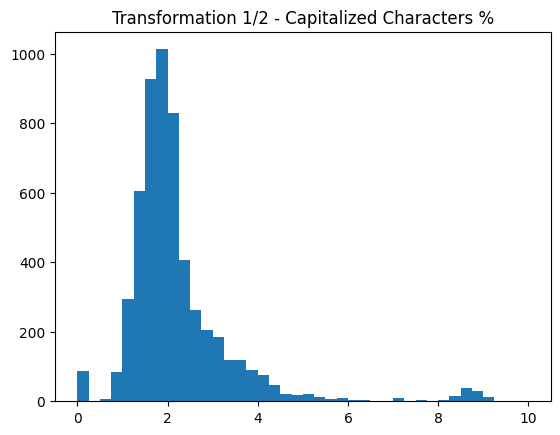

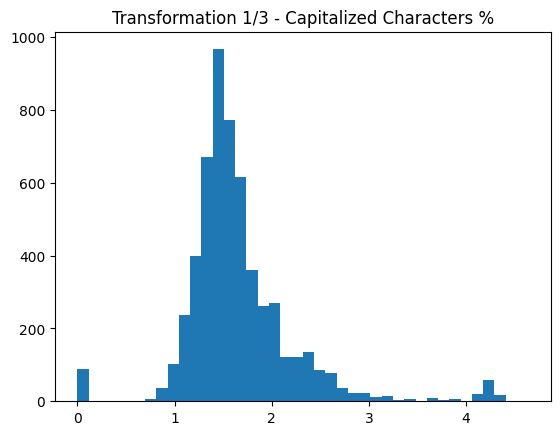

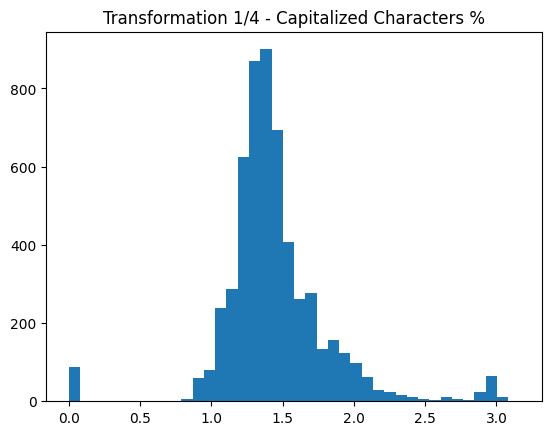

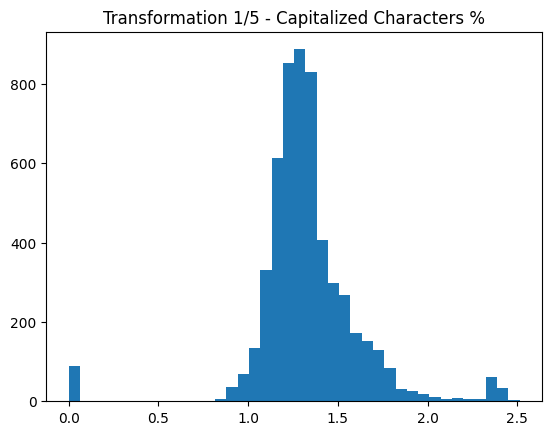

In [41]:
# Loop through different transformations
for i in [1,2,3,4,5]:
    pyplot.hist(data['caps_%']**(1/i),bins=40)
    pyplot.title(f"Transformation 1/{i} - Capitalized Characters %")
    pyplot.show()
# 5 is the best option